# Problem Statement:

## We have been hired as a data analyst by a sports management company. They are interested in forming a new team for the upcoming IPL Season 2018 and want our expertise to suggest players that will maximize their chances of winning matches.  Task is to analyze the IPL dataset and recommend the top-performing players in various positions to include in the new team.

# Dataset Description

### This dataset is taken from the IPL_Ball_by_Ball_2008_2022 database. It contains comprehensive data on IPL matches, teams, players, and performance metrics

## We need to form a IPL team from the given information consisting of 11 players.


# Solution :-


## importing required libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Dataset

In [48]:
df=pd.read_csv(r'C:\Users\DeLL\Documents\Learn And Build Data Science Summer Training\Major Project 1 IPL New Data\IPL_Ball_by_Ball_2008_2022.csv')

In [49]:
df

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [50]:
# shape of dataset

print("total rows: ",df.shape[0])
print("total columns: ",df.shape[1])
print ("total rows and columns",df.shape)

total rows:  225954
total columns:  17
total rows and columns (225954, 17)


In [51]:
# unique values in all the columns
df.nunique()

ID                   950
innings                6
overs                 20
ballnumber            10
batter               605
bowler               472
non-striker          595
extra_type             5
batsman_run            7
extras_run             7
total_run              8
non_boundary           2
isWicketDelivery       2
player_out           573
kind                  10
fielders_involved    535
BattingTeam           18
dtype: int64

In [52]:
df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

In [54]:
df.describe()

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery
count,2.259540e+05,225954.000000,225954.000000,225954.000000,225954.000000,225954.000000,225954.00000,225954.000000,225954.000000
mean,8.320470e+05,1.483868,9.185679,3.619750,1.243523,0.066907,1.31043,0.000093,0.049351
std,3.379542e+05,0.503104,5.681797,1.810633,1.618166,0.341470,1.60605,0.009640,0.216600
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.012620e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,8.297370e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.00000,0.000000,0.000000
75%,1.178395e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.00000,0.000000,0.000000
max,1.312200e+06,6.000000,19.000000,10.000000,6.000000,7.000000,7.00000,1.000000,1.000000


##  Firstly we will clean our data

In [55]:
df.isnull().any()

ID                   False
innings              False
overs                False
ballnumber           False
batter               False
bowler               False
non-striker          False
extra_type            True
batsman_run          False
extras_run           False
total_run            False
non_boundary         False
isWicketDelivery     False
player_out            True
kind                  True
fielders_involved     True
BattingTeam          False
dtype: bool

In [56]:
df.duplicated().any()

False

### Checking null values

In [57]:
df.isna().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

### Checking the percentage of missing value 

In [58]:
df['extra_type'].isnull().mean()*100

94.66749869442452

In [59]:
df['player_out'].isnull().mean()*100

95.06492471919063

In [60]:
df['kind'].isnull().mean()*100 

95.06492471919063

In [61]:
df['fielders_involved'].isnull().mean()*100 

96.4647671649982

In [62]:
df=df.drop(['extra_type'], axis=1)

In [63]:
df

,ID,innings,overs,ballnumber,batter,bowler,non-striker,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [64]:
df=df.drop(['player_out'], axis=1)

In [65]:
df=df.drop(['kind'], axis=1)

In [66]:
df=df.drop(['fielders_involved'], axis=1)

## We have seen that four of the columns of dataset have more than 94% of null values so we dropped these columns.

In [67]:


df

,ID,innings,overs,ballnumber,batter,bowler,non-striker,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,0,1,1,0,0,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,1,0,1,0,0,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,0,1,1,0,0,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,1,0,1,0,0,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,0,0,0,0,0,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,0,1,1,0,0,Royal Challengers Bangalore


##  Now we have cleaned our data, Our next step will be EDA(Exploratory Data Analysis)

### Which batsmans plays maximum no of balls

In [68]:
df.batter.value_counts().head(5)

V Kohli      5266
S Dhawan     5083
RG Sharma    4632
DA Warner    4313
SK Raina     4177
Name: batter, dtype: int64

### Number of batsman hits sixers

In [69]:

df[df['batsman_run']==6]['batter'].nunique()

400

In [70]:
df[df['batsman_run']==6]['batter'].describe()

count        10666
unique         400
top       CH Gayle
freq           359
Name: batter, dtype: object

## CH Gayle hits sixers 359(maximum no of times)among batters


### Now we are calculating top 5 batsman who hits six 

In [71]:
top_5_batsManwithSixers= df[df['batsman_run']==6]['batter'].value_counts()[df[df['batsman_run']==6]['batter'].value_counts() >= 223]
top_5_batsManwithSixers

CH Gayle          359
AB de Villiers    253
RG Sharma         241
MS Dhoni          229
KA Pollard        224
Name: batter, dtype: int64

### Number of batsman hits fours

In [72]:

df[df['batsman_run']==4]['batter'].nunique()

484

In [73]:
df[df['batsman_run']==4]['batter'].describe()

count        25500
unique         484
top       S Dhawan
freq           701
Name: batter, dtype: object

## S Dhawan hits four 701(maximum no of times)among batters

### Now we are calculating top 5 batsman who hits fours

In [74]:
top_5_batsManwithFours= df[df['batsman_run']==4]['batter'].value_counts()[df[df['batsman_run']==4]['batter'].value_counts() >= 505]
top_5_batsManwithFours

S Dhawan     701
V Kohli      581
DA Warner    577
RG Sharma    519
SK Raina     506
Name: batter, dtype: int64

### Top 5 players with maximum number of runs

In [75]:
totalrun=df.groupby('batter').agg({'batsman_run':'sum','batter':'count'}).sort_values(by='batsman_run',ascending=False).head(5)
totalrun.rename(columns={'batter':'No.of balls'},inplace=True)
totalrun

,batsman_run,No.of balls
batter,,
V Kohli,6634,5266
S Dhawan,6244,5083
DA Warner,5883,4313
RG Sharma,5881,4632
SK Raina,5536,4177


### Visualize the above data

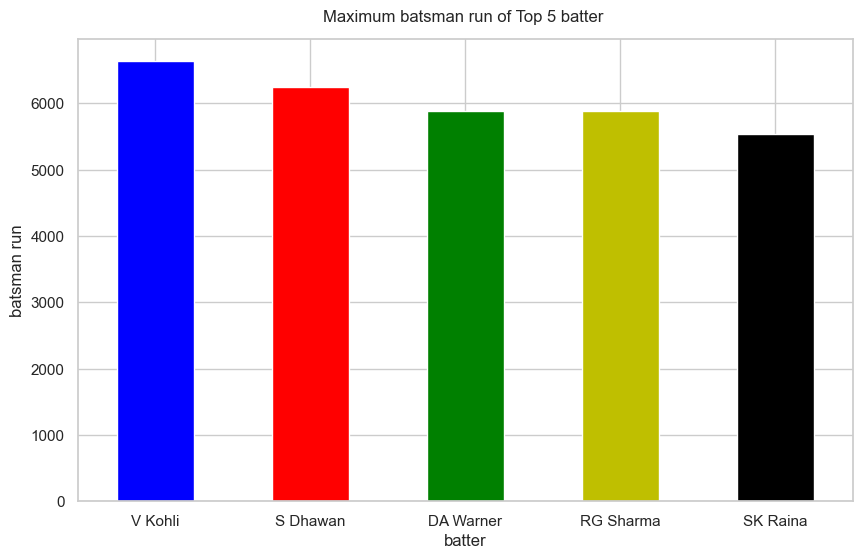

In [76]:
f, ax = plt.subplots(1,figsize=(10,6))

totalrun['batsman_run'].plot.bar(color=['b', 'r', 'g', 'y', 'k'],ax=ax)
ax.set_ylabel('batsman run')
ax.set_title('Maximum batsman run of Top 5 batter ', y=1.02)
ax.set_xticklabels(totalrun.index, rotation = 0);

## Top 5 batsman with maximum average 

In [77]:
totalrun=df.groupby('batter').agg({'batsman_run':'mean','batter':'count'}).sort_values(by='batsman_run',ascending=False).head(5)
totalrun.rename(columns={'batter':'No.of balls'},inplace=True)
totalrun

,batsman_run,No.of balls
batter,,
PN Mankad,4.000000,1
B Stanlake,2.500000,2
Umar Gul,2.052632,19
RS Sodhi,2.000000,2
TH David,1.989362,94


### Visualize the above data:-

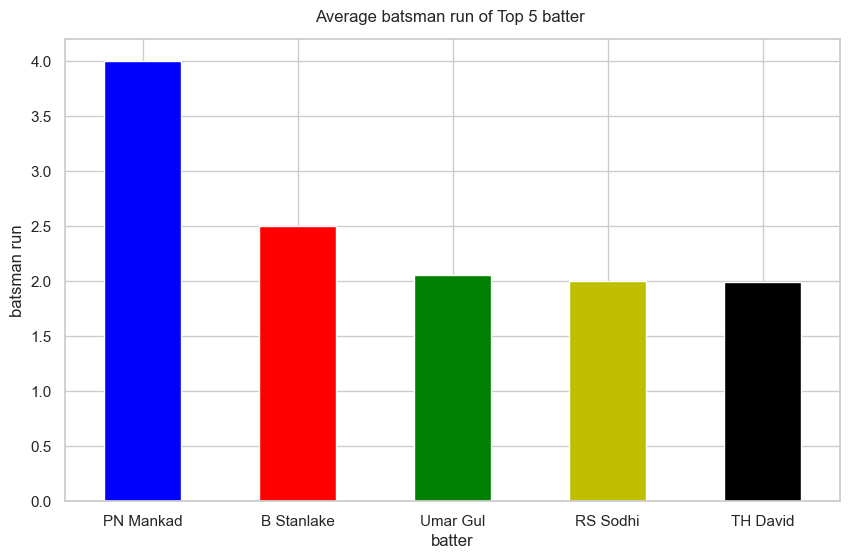

In [78]:
f, ax = plt.subplots(1,figsize=(10,6))

totalrun['batsman_run'].plot.bar(color=['b', 'r', 'g', 'y', 'k'],ax=ax)
ax.set_ylabel('batsman run')
ax.set_title('Average batsman run of Top 5 batter ', y=1.02)
ax.set_xticklabels(totalrun.index, rotation = 0);

### Top 5 batsman in terms of  total runs

In [79]:
top5_batsman = df.groupby('batter').agg({'total_run':'sum'}).sort_values(by='total_run',ascending=False).head(5)
top5_batsman

,total_run
batter,
V Kohli,6876
S Dhawan,6561
DA Warner,6191
RG Sharma,6083
SK Raina,5780


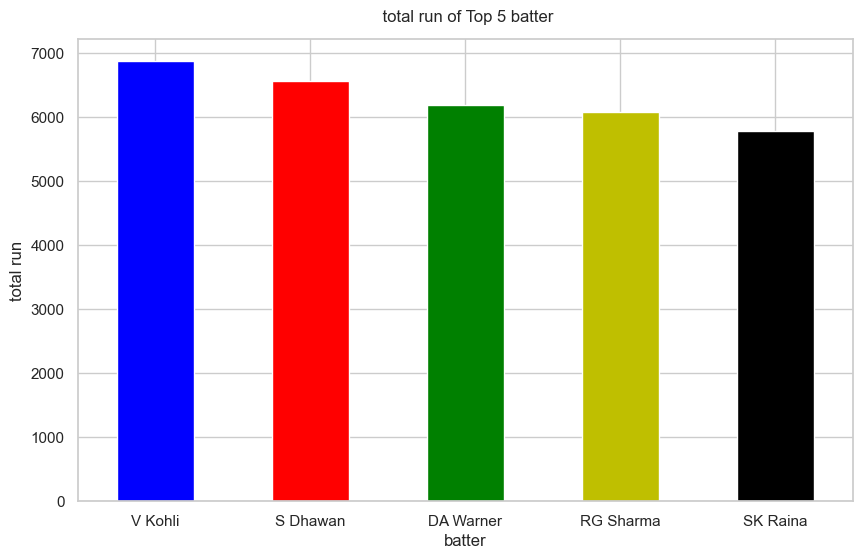

In [80]:
f, ax = plt.subplots(1,figsize=(10,6))

top5_batsman['total_run'].plot.bar(color=['b', 'r', 'g', 'y', 'k'],ax=ax)
ax.set_ylabel('total run')
ax.set_title(' total run of Top 5 batter', y=1.02)
ax.set_xticklabels(top5_batsman.index, rotation = 0);

In [81]:
df[df['non_boundary']!=0]

,ID,innings,overs,ballnumber,batter,bowler,non-striker,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,BattingTeam
4632,1304101,1,11,2,DP Conway,MR Marsh,S Dube,4,0,4,1,0,Chennai Super Kings
10604,1304076,1,2,6,JC Buttler,UT Yadav,D Padikkal,4,0,4,1,0,Rajasthan Royals
13067,1304066,1,0,3,D Padikkal,PVD Chameera,JC Buttler,4,0,4,1,0,Rajasthan Royals
30579,1254065,2,11,3,F du Plessis,JA Richardson,MM Ali,4,0,4,1,0,Chennai Super Kings
32612,1237180,1,6,4,S Dhawan,Rashid Khan,MP Stoinis,6,0,6,1,0,Delhi Capitals
35356,1216539,1,15,1,RR Pant,SM Curran,SS Iyer,4,0,4,1,0,Delhi Capitals
48304,1178430,2,13,2,N Pooran,DJ Bravo,Mandeep Singh,4,0,4,1,0,Kings XI Punjab
70980,1136580,2,9,2,KS Williamson,SR Watson,Shakib Al Hasan,4,0,4,1,0,Sunrisers Hyderabad
86889,1082601,1,18,6,MM Sharma,TA Boult,VR Aaron,4,0,4,1,0,Kings XI Punjab
88601,1082594,2,12,4,GJ Maxwell,RD Chahar,DA Miller,4,0,4,1,0,Kings XI Punjab


### Top 5 batsman in terms of non_boundary

In [82]:
top5_batsman = df.groupby('batter').agg({'non_boundary':'sum'}).sort_values(by='non_boundary',ascending=False).head(5)
top5_batsman

,non_boundary
batter,
V Kohli,2
F du Plessis,1
S Dhawan,1
GJ Maxwell,1
RG Sharma,1


## Visualize the above data

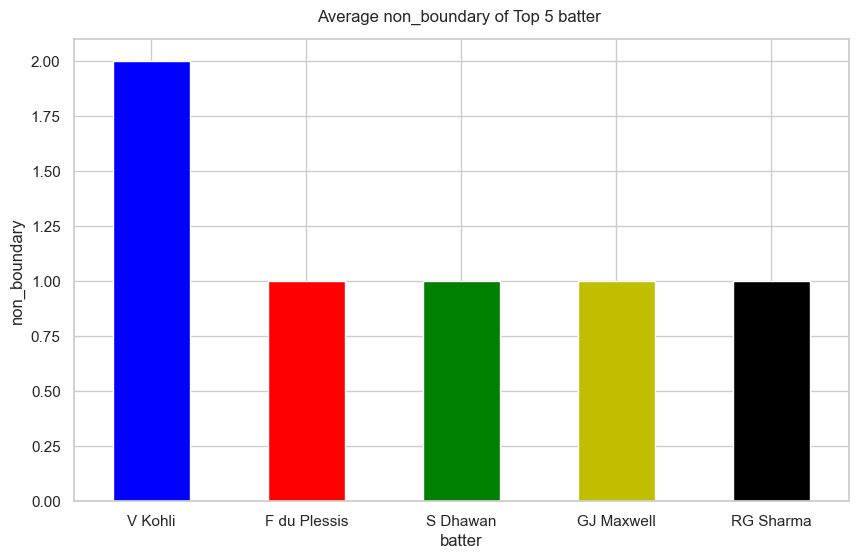

In [83]:
f, ax = plt.subplots(1,figsize=(10,6))

top5_batsman['non_boundary'].plot.bar(color=['b', 'r', 'g', 'y', 'k'],ax=ax)
ax.set_ylabel('non_boundary')
ax.set_title('Average non_boundary of Top 5 batter ', y=1.02)
ax.set_xticklabels(top5_batsman.index, rotation = 0);

##  Now analyse the data for bowlers

In [84]:
df['bowler'].describe()

count       225954
unique         472
top       R Ashwin
freq          4024
Name: bowler, dtype: object

### Total 472 bowlers in which R Ashwin did bowling maximum number of times

### Top 10 bowlers according to the number of times they did bowling

In [85]:
df.bowler.value_counts().head(10)

R Ashwin           4024
SP Narine          3516
Harbhajan Singh    3496
B Kumar            3384
A Mishra           3317
PP Chawla          3309
DJ Bravo           3296
RA Jadeja          3262
SL Malinga         2974
UT Yadav           2945
Name: bowler, dtype: int64

### Players according to the number of times they bowled

In [86]:
wickets = df.groupby('bowler').agg({'ballnumber':'count'}).sort_values(by='ballnumber',ascending=False).head(5)
wickets

,ballnumber
bowler,
R Ashwin,4024
SP Narine,3516
Harbhajan Singh,3496
B Kumar,3384
A Mishra,3317


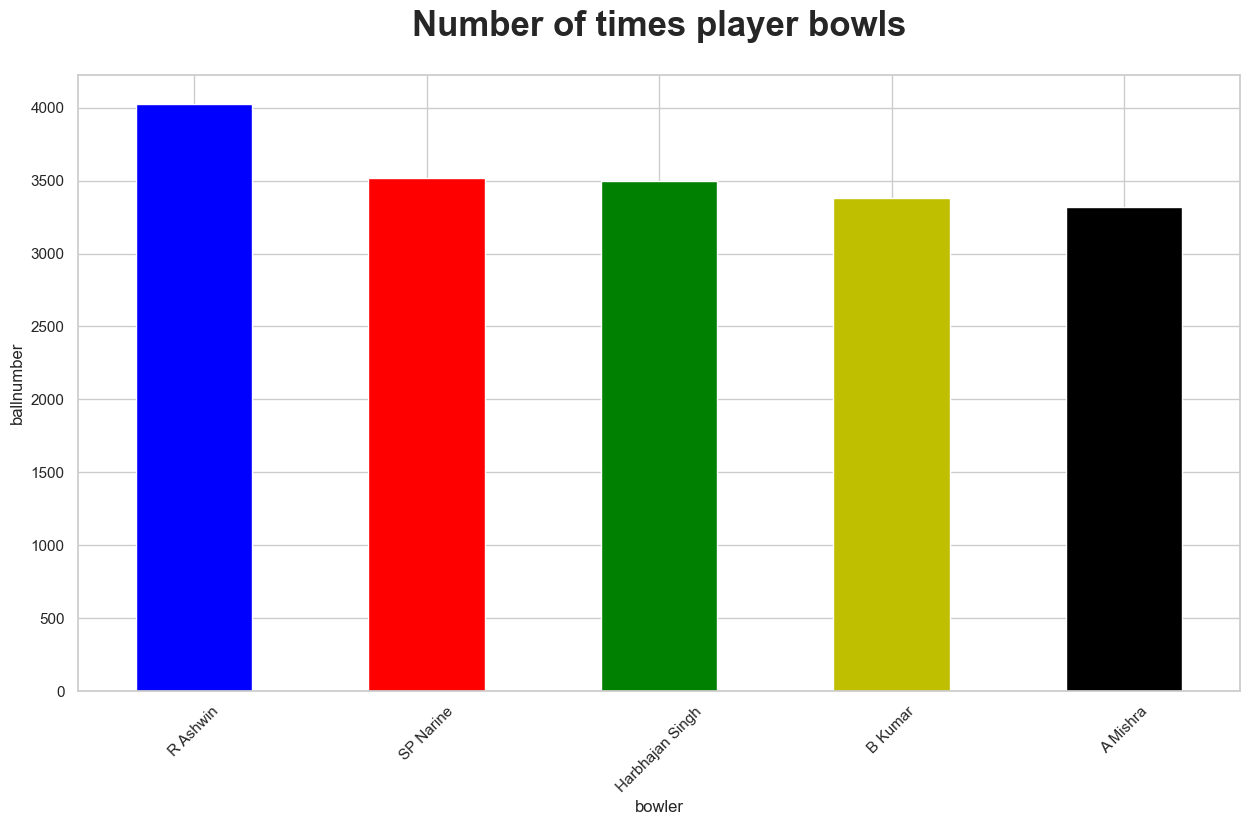

In [87]:
# top 5 Director in terms of rating 
sns.set_theme(context='notebook',palette='viridis' ,style='whitegrid')
f, ax = plt.subplots(1,figsize=(15,8))
wickets['ballnumber'].plot.bar(color=['b', 'r', 'g', 'y', 'k'],ax=ax)
ax.set_ylabel('ballnumber')
ax.set_title('Number of times player bowls', y=1.05,fontsize=25, weight='bold')
ax.set_xticklabels(wickets.index, rotation = 45);


### Players according to the number of wickets they take

In [88]:
wicket_delivery = df.groupby('bowler').agg({'isWicketDelivery':'sum'}).sort_values(by='isWicketDelivery',ascending=False).head(5)
wicket_delivery

,isWicketDelivery
bowler,
DJ Bravo,207
SL Malinga,188
A Mishra,175
R Ashwin,174
YS Chahal,172


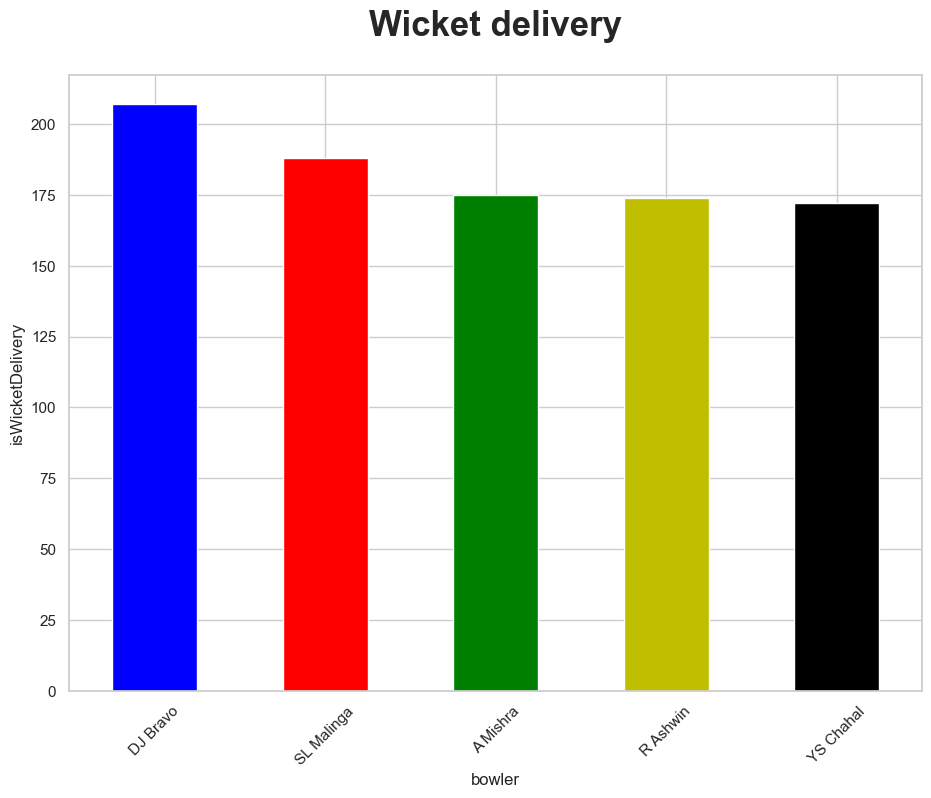

In [89]:
# top 5 Director in terms of rating 
sns.set_theme(context='notebook',palette='viridis' ,style='whitegrid')
f, ax = plt.subplots(1,figsize=(11,8))
wicket_delivery['isWicketDelivery'].plot.bar(color=['b', 'r', 'g', 'y', 'k'],ax=ax)
ax.set_ylabel('isWicketDelivery')
ax.set_title('Wicket delivery', y=1.05,fontsize=25, weight='bold')
ax.set_xticklabels(wicket_delivery.index, rotation = 45);

In [90]:
top5_ballers = df.groupby('bowler').agg({'isWicketDelivery':'mean','ballnumber':'sum'}).sort_values(by='isWicketDelivery',ascending=False).head(5)
top5_ballers

,isWicketDelivery,ballnumber
bowler,,
AC Gilchrist,1.000000,1
D Brevis,0.333333,6
Sachin Baby,0.300000,31
A Badoni,0.166667,42
AM Rahane,0.166667,21


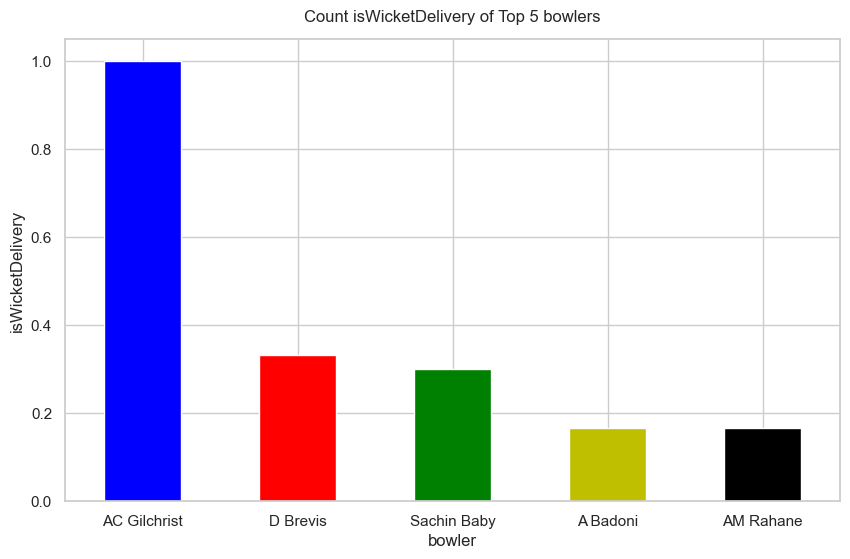

In [91]:
f, ax = plt.subplots(1,figsize=(10,6))

top5_ballers['isWicketDelivery'].plot.bar(color=['b', 'r', 'g', 'y', 'k'],ax=ax)
ax.set_ylabel('isWicketDelivery')
ax.set_title('Count isWicketDelivery of Top 5 bowlers', y=1.02)
ax.set_xticklabels(top5_ballers.index, rotation = 0);

In [92]:
df[df['bowler']==df['batter']]

,ID,innings,overs,ballnumber,batter,bowler,non-striker,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,BattingTeam


### There is no player who did bowling and batting both.

## Conclusion:-

### Batters:
##### 1. CH Gayle =Because he hits maximum sixes.
##### 2. S Dhawan=Because he hits maximum fours and also comes in the category of top 4 players who scored maximum total runs.
##### 3. V Kohli =Because he has scored maximum runs and also played  maximum no of balls and hitted fours  581 times and scored 2 non boundary runsand also comes in the category of top 4 players who scored maximum total runs.
##### 4.  DA Warner= Because he hitted 577 times fours which is third highest and 5883 batsman_run which is 3rd maximum batsman_run and he did batting 4313 which is third maximum times batting and also comes in the category of top 4 players who scored maximum total runs.
##### 5.  RG Sharma = Because he hitted 241 times sixers and 519 times fours and and scored  5881 batsman run which is fourth highestand also comes in the category of top 4 players who scored maximum total runs.

### Bowlers:-
##### 6. R Ashwin:- He did 4024  times bowling which is highest among all bowlers and takes 174 times wicket and the difference between balls he did and   total run is less means his bowling was that much good and batsman even can't manage to take more runs
##### 7.SP Narine :- He did 3516 times bowling which is second highest among all bowlers and the difference between balls he did and  total run is less means his bowling was that much good that batsman can't manage to take more runs
##### 8. DJ Bravo :- He tooks the maximum no of wickets among all bowlers.
##### 9. SL Malinga :- He took 188 times wicket i.e. second highest wicket hitter
##### 10. A Mishra :- He did  3317 times and bowling and  175 times took wicket and also the difference bwtween ballnumber and total is not that much big.